In [20]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
conn = sql.connect('database.sqlite')
conn

In [6]:
def sq(q):
    return pd.read_sql_query(q,conn)

In [7]:
pd.read_sql_query("select * from salaries",conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,9999999.00,567595.43,2011,,San Francisco,
1,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
2,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
3,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
4,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189082.74,,316285.74,316285.74,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148648,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148649,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148650,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


###  Top 10 highest paid employees (by TotalPayBenefits)

In [8]:
q = ("""SELECT EmployeeName, JobTitle, TotalPayBenefits
FROM salaries
ORDER BY TotalPayBenefits DESC
LIMIT 10""")

sq(q)

,EmployeeName,JobTitle,TotalPayBenefits
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43
1,David Shinn,Deputy Chief 3,510732.68
2,Amy P Hart,Asst Med Examiner,479652.21
3,William J Coaker Jr.,Chief Investment Officer,436224.36
4,Gregory P Suhr,Chief of Police,425815.28
5,Joanne M Hayes-White,"Chief, Fire Department",422353.40
6,Gregory P Suhr,Chief of Police,418019.22
7,Joanne M Hayes-White,"Chief, Fire Department",417435.10
8,Ellen G Moffatt,Asst Med Examiner,415767.94
9,Gary Altenberg,"Lieutenant, Fire Suppression",407274.78


### Find which year has missing data of Employees with 'Not Provided'/ 'Not provided'

In [9]:
q = ('''SELECT DISTINCT Year FROM Salaries WHERE EmployeeName like 'Not Provided%';''')
sq(q)

,Year
0,2011
1,2012
2,2014


### Number of unique agencies

In [10]:
q = ('SELECT COUNT(DISTINCT Agency) FROM Salaries')
sq(q)

,COUNT(DISTINCT Agency)
0,1


### Show Average BasePay, OvertimePay, and TotalPay for year 2011

In [11]:
q = ('''SELECT AVG(BasePay), AVG(OvertimePay), AVG(TotalPay) FROM Salaries WHERE Year=2011;''')
sq(q)

,AVG(BasePay),AVG(OvertimePay),AVG(TotalPay)
0,63593.401894,4524.411277,71992.050063


### Plot the top 10 job titles with the highest TotalPay in 2014.


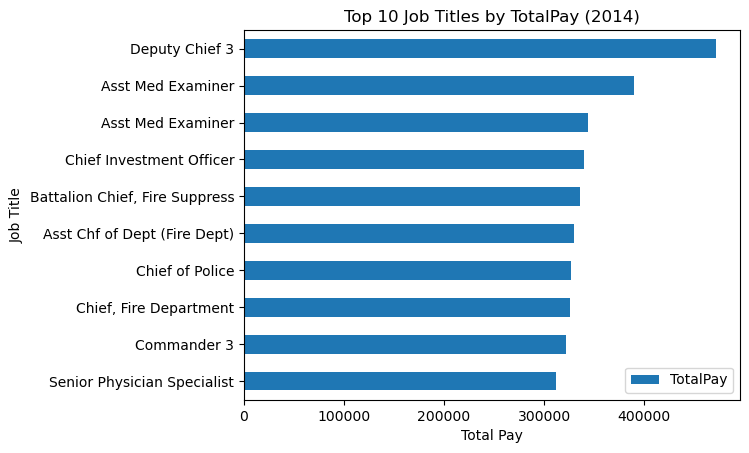

In [24]:
q = ('''select JobTitle, TotalPay
from Salaries
where Year=2014
order by TotalPay Desc
limit 10;''')
sq(q)

df.plot(
    x="JobTitle",
    y="TotalPay",
    kind="barh",
    title="Top 10 Job Titles by TotalPay (2014)"
)

plt.xlabel("Total Pay")
plt.ylabel("Job Title")
plt.gca().invert_yaxis()
plt.show()


### Which job titles have overtime pay exceeding $150,000 exluding 'Not provided'

In [16]:
q = ('''SELECT JobTitle, OvertimePay
FROM salaries
WHERE OvertimePay > 150000
  AND JobTitle <> 'Not provided';

''')
sq(q)

,JobTitle,OvertimePay
0,"Lieutenant, Fire Suppression",220909.48
1,EMT/Paramedic/Firefighter,192424.49
2,Firefighter,160418.47
3,"Lieutenant, Fire Suppression",163477.81
4,Deputy Sheriff,196689.18
5,Deputy Sheriff,156077.49
6,Deputy Sheriff,173547.73
7,Deputy Sheriff,173178.23
8,Deputy Sheriff,169659.92


### Find all employees whose job titles contain the word “CHIEF”

In [14]:
q = ('''SELECT EmployeeName, JobTitle
FROM salaries
WHERE JobTitle LIKE '%CHIEF%';
''')
sq(q)

,EmployeeName,JobTitle
0,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
1,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II
2,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)"
3,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)"
4,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)"
...,...,...
622,Sharon C Jackson,Chief Deputy Adlt Probation Of
623,Anita S Lee,Chief Clerk
624,George D Vaughan,Chief Nursery Specialist
625,Patrick W Gillespie,Chief Preparator


### Count how many employees have job titles containing “ENGINEER” and “Fire” in year 2012 and 2013

In [28]:
q = ('''SELECT Year, COUNT(*)
FROM salaries
WHERE JobTitle LIKE '%ENGINEER%' 
   OR JobTitle LIKE '%Fire%'
AND Year = 2012 OR Year = 2013
GROUP BY Year;''')
sq(q)

,Year,COUNT(*)
0,2011,1592
1,2012,2463
2,2013,37606
3,2014,1083


### Distinct job titles starting with "CAPTAIN"

In [29]:
q = ('''SELECT DISTINCT JobTitle
FROM Salaries
WHERE JobTitle LIKE 'CAPTAIN%';''')
sq(q)


,JobTitle
0,CAPTAIN III (POLICE DEPARTMENT)
1,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES"
2,"CAPTAIN, FIRE SUPPRESSION"
3,"CAPTAIN, BUREAU OF FIRE PREVENTION AND PUBLIC ..."
4,Captain 3
5,"Captain, Fire Suppression"
6,"Captain, Emergency Med Svcs"
7,"Captain, (Fire Department)"


### Employees having basepay > 50k and totalpay < 150000 exlucding 'Not Provided'

In [31]:
q= ('''SELECT EmployeeName, BasePay, TotalPay
FROM Salaries
WHERE BasePay > 50000
  AND TotalPay < 150000
  AND EmployeeName NOT LIKE 'Not Provided%';
''')
sq(q)


,EmployeeName,BasePay,TotalPay
0,JAY DOWKE,112380.37,149987.24
1,MURRAY BOND,149975.8,149975.80
2,MARILOU GAN,119703.78,149970.85
3,BRIAN COLLINS,105934.65,149964.61
4,GREGORY NEAL,106065.2,149952.47
...,...,...,...
87253,Renee J Allen,52428.53,53458.31
87254,Melody M Butterworth,52389.79,52555.44
87255,Stephanie Reidy,51668.7,51785.23
87256,Paul E Maltzer,51673.98,51673.98
